<a href="https://colab.research.google.com/github/hkorneliussen/ACIT4030_Project/blob/main/Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Some title

In [ ]:
%%capture
#Cloning github repository
!git clone https://github.com/hkorneliussen/ACIT4030_Project.git

#getting pretrained model, stored in kaggle
!mkdir -p ~/.kaggle
!cp /content/ACIT4030_Project/models/kaggle.json ~/.kaggle/

##Pix2pix model training

/content/ACIT4030_Project
pix2pix_training/image_dataset


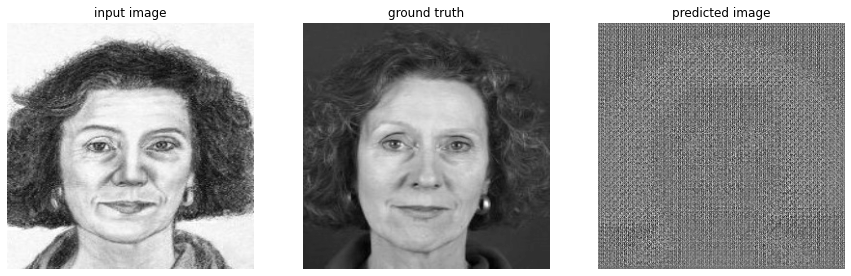

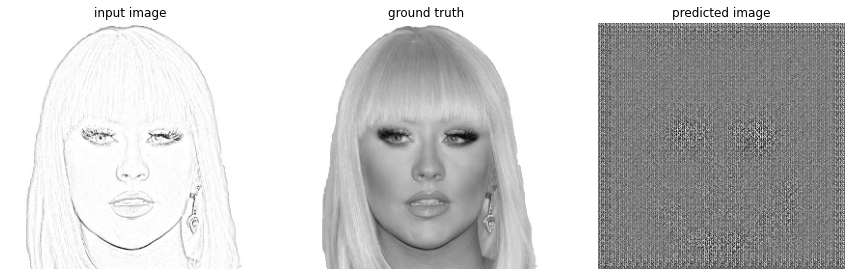

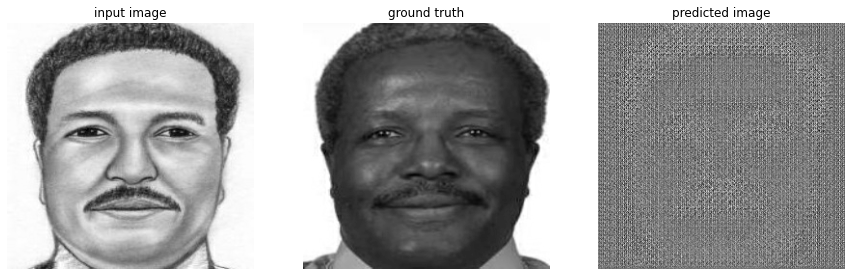

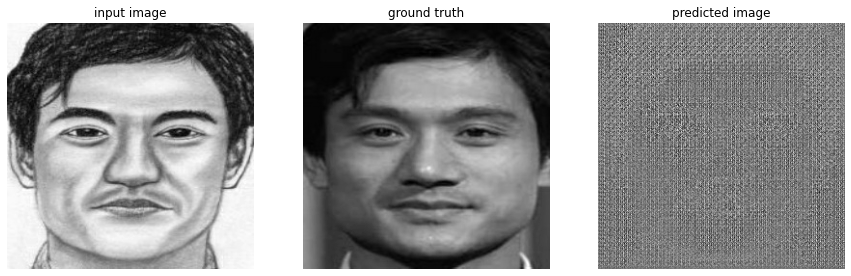

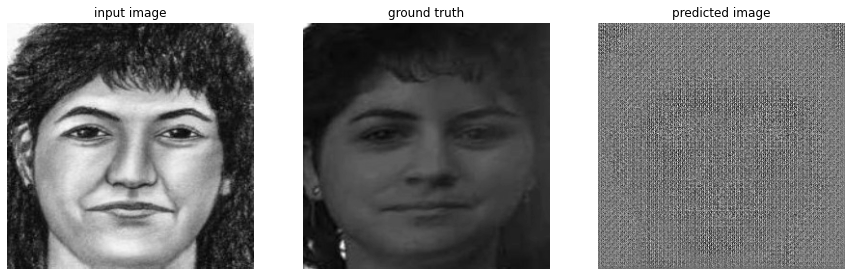

In [ ]:
%cd /content/ACIT4030_Project
!mkdir -p ~/.kaggle
!cp /content/ACIT4030_Project/models/kaggle.json ~/.kaggle/
%run pix2pix_trainer.py

##Image generation from sketch (pix2pix)

In [ ]:
%%capture
%cd /content
!kaggle datasets download -d hannekorneliussen/pretrained-pix2pix-model
!unzip /content/pretrained-pix2pix-model.zip -d /content/ACIT4030_Project/models

/content/ACIT4030_Project


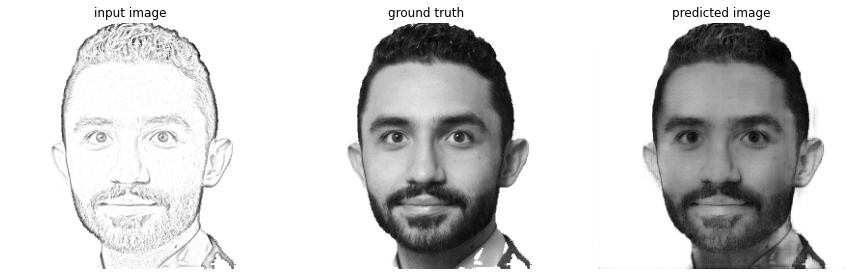

In [ ]:
#running 2D image generation (gray scale) script (pix2pix)
%cd /content/ACIT4030_Project
%run pix2pix.py

##Upscaling and resolution

In [ ]:
%%capture
#downloading resolution model
%cd /content
!kaggle datasets download -d hannekorneliussen/resolution-model
!unzip /content/resolution-model.zip -d /content/ACIT4030_Project/models

#running upscaling and resolution script
%cd /content/ACIT4030_Project
%run resolution.py

##Colorize

/content/ACIT4030_Project


Downloading: "https://colorizers.s3.us-east-2.amazonaws.com/siggraph17-df00044c.pth" to /root/.cache/torch/hub/checkpoints/siggraph17-df00044c.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

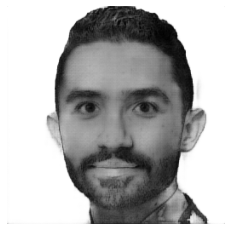

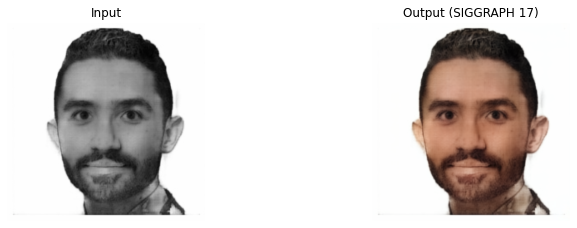

In [ ]:
%cd /content/ACIT4030_Project
%run colorize.py -i output/2D_Image_grayscale_upscaled.jpg -o output/

##3D model generation (DECA)

In [ ]:
%%capture
#Installing requirements
!pip install -q kornia==0.4.0 yacs==0.1.8 face_alignment ninja fvcore
!apt -q install -y zip unzip ffmpeg libsm6 libxext6
!pip install 'torch==1.6.0'
!pip install 'torchvision==0.7.0'
!pip install -q 'pytorch3d==0.2.5'
!pip install -q numpy scipy chumpy scikit-image opencv-python PyYAML face-alignment yacs kornia ninja fvcore
!pip install -q lucid>=0.2.3 gdown matplotlib

In [ ]:
%%capture
#Downloading DECA data
!mkdir -p /content/ACIT4030_Project/data 
%cd /content
!kaggle datasets download -d hannekorneliussen/deca-data
!unzip /content/deca-data.zip -d /content/ACIT4030_Project/data
#running 3D model script to generate 3D objects
%cd /content/ACIT4030_Project
input_image = "/content/ACIT4030_Project/output/2D_Image_color.jpg" 
output_folder = "output/3D"
!python 3D_model.py -i $input_image -s $output_folder --saveDepth True --saveObj True

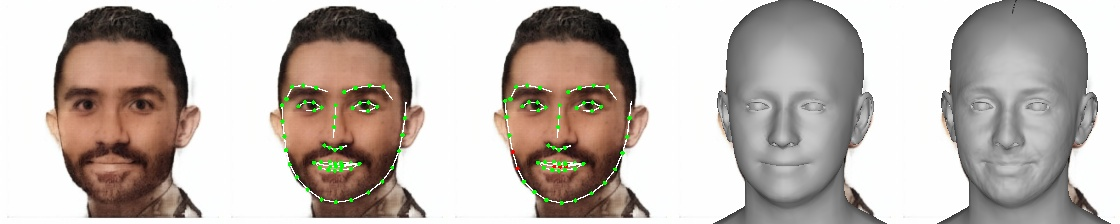

In [ ]:
#showing results from DECA model
import cv2 
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/ACIT4030_Project/output/3D/2D_Image_color_vis_original_size.jpg")
cv2_imshow(image)